# CIA Lab 1

---

## Question 1: XOR Gate classification


> **Scenario:** <br>
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.


**Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the output of an XOR gate. Perform the following steps**

**1. Create XOR Gate truth table**

In [1]:
import numpy as np

# XOR Truth Table
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# XOR Outputs
y = np.array([0, 1, 1, 0])


**2. Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch Pitts) Neuron.**

In [4]:
class MCPNeuron:
    def __init__(self, input_size, threshold=0.5, learning_rate=0.1):
        self.weights = np.zeros(input_size)
        self.threshold = threshold
        self.learning_rate = learning_rate

    def activation(self, x):
        # Step function (Threshold function)
        return 1 if x >= self.threshold else 0

    def predict(self, inputs):
        # Weighted sum
        weighted_sum = np.dot(inputs, self.weights)
        return self.activation(weighted_sum)

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                # Update rule
                self.weights += self.learning_rate * (target - prediction) * inputs

                # Print weights for observation
                print(f'Epoch: {epoch+1}, Weights: {self.weights}, Prediction: {prediction}')

# Initialize the perceptron
mcp_neuron = MCPNeuron(input_size=2)

# Train the perceptron on the XOR data
mcp_neuron.train(X, y, epochs=10)


Epoch: 1, Weights: [0. 0.], Prediction: 0
Epoch: 1, Weights: [0.  0.1], Prediction: 0
Epoch: 1, Weights: [0.1 0.1], Prediction: 0
Epoch: 1, Weights: [0.1 0.1], Prediction: 0
Epoch: 2, Weights: [0.1 0.1], Prediction: 0
Epoch: 2, Weights: [0.1 0.2], Prediction: 0
Epoch: 2, Weights: [0.2 0.2], Prediction: 0
Epoch: 2, Weights: [0.2 0.2], Prediction: 0
Epoch: 3, Weights: [0.2 0.2], Prediction: 0
Epoch: 3, Weights: [0.2 0.3], Prediction: 0
Epoch: 3, Weights: [0.3 0.3], Prediction: 0
Epoch: 3, Weights: [0.2 0.2], Prediction: 1
Epoch: 4, Weights: [0.2 0.2], Prediction: 0
Epoch: 4, Weights: [0.2 0.3], Prediction: 0
Epoch: 4, Weights: [0.3 0.3], Prediction: 0
Epoch: 4, Weights: [0.2 0.2], Prediction: 1
Epoch: 5, Weights: [0.2 0.2], Prediction: 0
Epoch: 5, Weights: [0.2 0.3], Prediction: 0
Epoch: 5, Weights: [0.3 0.3], Prediction: 0
Epoch: 5, Weights: [0.2 0.2], Prediction: 1
Epoch: 6, Weights: [0.2 0.2], Prediction: 0
Epoch: 6, Weights: [0.2 0.3], Prediction: 0
Epoch: 6, Weights: [0.3 0.3], Pred

**3. Observe and discuss the perceptron's performance in this scenario.**

Weight Updates: During each epoch, the perceptron adjusts its weights based on the errors it makes. Since XOR is non-linearly separable, the weights will oscillate rather than converge to a solution. The printed weights should indicate that the perceptron is struggling to find a stable set of weights.

Predictions: After each update, we can monitor the perceptron's predictions on the XOR inputs. A perceptron might correctly classify some inputs but will fail on others due to the inability to linearly separate the data.

In [10]:
# Testing perceptron after training
predictions = []
for inputs in X:
    prediction = mcp_neuron.predict(inputs)
    predictions.append(prediction)

print(f"Predictions after training: {predictions}")
print(f"Actual labels: {y}")


Predictions after training: [0, 0, 0, 0]
Actual labels: [0 1 1 0]


Prediction Accuracy: Observe that the perceptron gets at least one input wrong because it cannot linearly separate the XOR data. This showcases the limitations of the perceptron model.

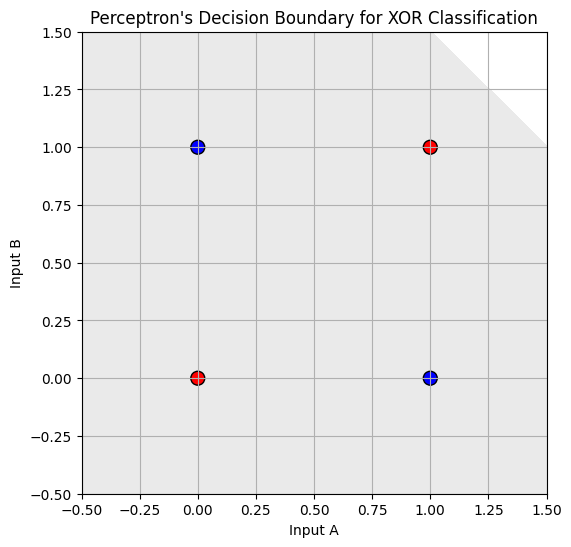

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Function to plot decision boundary
def plot_decision_boundary(weights, threshold):
    # Define grid
    x_values = np.linspace(-0.5, 1.5, 100)
    y_values = np.linspace(-0.5, 1.5, 100)
    grid = np.array([[mcp_neuron.activation(np.dot([x, y], weights)) for x in x_values] for y in y_values])

    plt.figure(figsize=(6, 6))

    # Plot the contour of the decision boundary
    plt.contourf(x_values, y_values, grid, levels=[-0.5, 0.5], cmap="coolwarm", alpha=0.6)
    colors = ['red' if label == 0 else 'blue' for label in y]
    # Plot the XOR data points
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='black')

    plt.title("Perceptron's Decision Boundary for XOR Classification")
    plt.xlabel("Input A")
    plt.ylabel("Input B")
    plt.grid(True)
    plt.show()

# Plot decision boundary after training
plot_decision_boundary(mcp_neuron.weights, mcp_neuron.threshold)


**5. Implement XOR using Multi-Layer Perceptron.**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions

In [18]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# XOR Outputs
y = np.array([0, 1, 1, 0])

mlp = MLPClassifier(activation='relu', max_iter=10000, hidden_layer_sizes=(4,2))
mlp.fit(X, y)

# mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', max_iter=10000, random_state=42)

# Train the MLP on the XOR data
mlp.fit(X, y)

# Print the MLP's learned weights and biases
print(f"Weights between input and hidden layer:\n{mlp.coefs_[0]}")
print(f"Weights between hidden and output layer:\n{mlp.coefs_[1]}")

Weights between input and hidden layer:
[[-8.34390282e-14 -1.52679792e+00 -1.52275906e-04  9.11171369e-01]
 [-1.29129293e-24  1.52710484e+00 -7.10167243e-09 -9.11615061e-01]]
Weights between hidden and output layer:
[[ 2.29142238e-22  1.85283071e-05]
 [ 3.52116277e-01  2.75749575e+00]
 [ 7.34610872e-04  1.08578814e-51]
 [-1.76582029e+00  3.60804721e-01]]


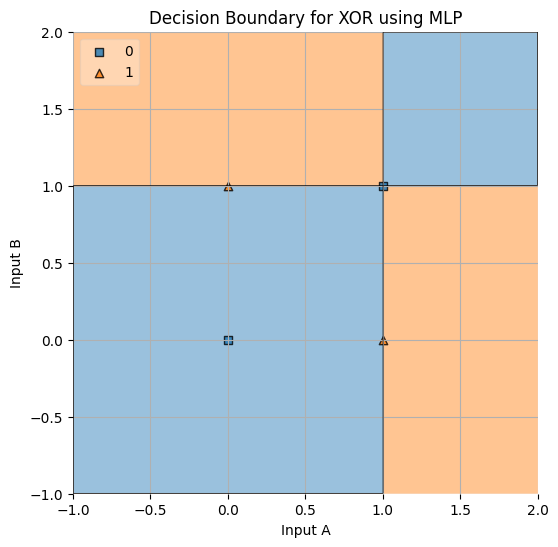

In [19]:
# Plot the decision boundary of the MLP
plt.figure(figsize=(6, 6))
plot_decision_regions(X, y, clf=mlp, legend=2)

# Plot settings
plt.title("Decision Boundary for XOR using MLP")
plt.xlabel("Input A")
plt.ylabel("Input B")
plt.grid(True)

# Show plot
plt.show()


In [20]:
# Test the MLP on the XOR inputs
predictions = mlp.predict(X)

print(f"Predictions: {predictions}")
print(f"Actual labels: {y}")


Predictions: [0 1 1 0]
Actual labels: [0 1 1 0]


By adding a hidden layer to the network, the MLP can solve the XOR classification problem correctly. The non-linear decision boundary it creates allows it to separate the data correctly, unlike the linear boundary of a single-layer perceptron. This demonstrates how multilayer networks can handle more complex tasks, solving problems that simple perceptrons cannot.

## Question 2: Sentiment Analysis Using ANN on IMDb Movie Reviews


1. **Use One or more hidden layers with ReLU activation and an output layer with
sigmoid activation for binary classification.**
2. **Use the binary cross-entropy loss function for training the model.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nndl/cia1_labtest/IMDB Dataset.csv')

print("Dataset Overview:")
print(f"Number of reviews: {len(df)}")
print(f"\nSample reviews:\n{df['review'].head()}")
print(f"\nValue counts for sentiment:\n{df['sentiment'].value_counts()}")

Dataset Overview:
Number of reviews: 50000

Sample reviews:
0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

Value counts for sentiment:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
nltk.download('punkt')
nltk.download('stopwords')

def load_and_explore_data():
    # Load the dataset
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nndl/cia1_labtest/IMDB Dataset.csv')

    print("Dataset Overview:")
    print(f"Number of reviews: {len(df)}")
    print(f"\nSample reviews:\n{df['review'].head()}")
    print(f"\nValue counts for sentiment:\n{df['sentiment'].value_counts()}")

    return df

def text_preprocessing(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

def create_length_features(df):
    df['review_length'] = df['review'].apply(len)
    df['word_count'] = df['review'].apply(lambda x: len(word_tokenize(x)))
    return df

def plot_length_distributions(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Review Length Distribution
    sns.histplot(data=df, x='review_length', hue='sentiment', ax=ax1)
    ax1.set_title('Distribution of Review Lengths')
    ax1.set_xlabel('Review Length (characters)')

    # Word Count Distribution
    sns.histplot(data=df, x='word_count', hue='sentiment', ax=ax2)
    ax2.set_title('Distribution of Word Counts')
    ax2.set_xlabel('Word Count')

    plt.tight_layout()
    plt.show()

def plot_sentiment_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='sentiment')
    plt.title('Distribution of Sentiments')
    plt.show()


def get_common_words(df, sentiment, n=10):
    text = ' '.join(df[df['sentiment'] == sentiment]['review'])
    text = text_preprocessing(text)

    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]

    word_freq = Counter(words).most_common(n)
    words, freqs = zip(*word_freq)

    plt.figure(figsize=(10, 5))
    plt.bar(words, freqs)
    plt.title(f'Most Common Words in {sentiment.capitalize()} Reviews')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

df = load_and_explore_data()

df = create_length_features(df)

print("\nPlotting common words...")
for sentiment in df['sentiment'].unique():
    get_common_words(df, sentiment)

Dataset Overview:
Number of reviews: 50000

Sample reviews:
0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

Value counts for sentiment:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64



Plotting sentiment distribution...


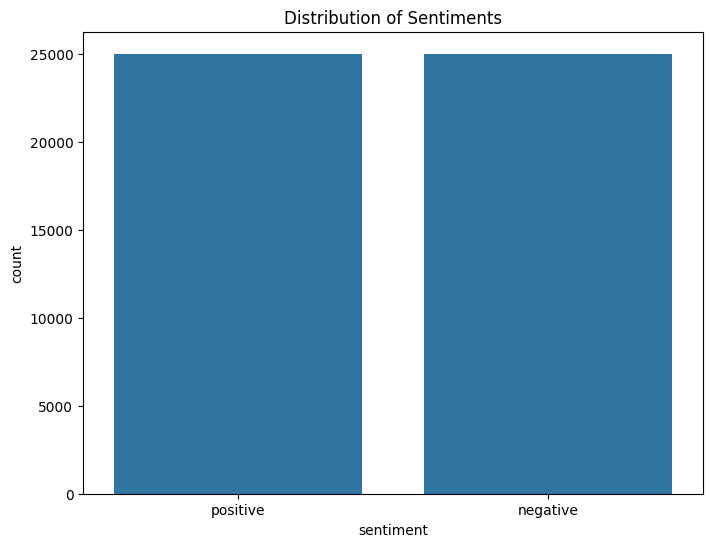


Plotting length distributions...


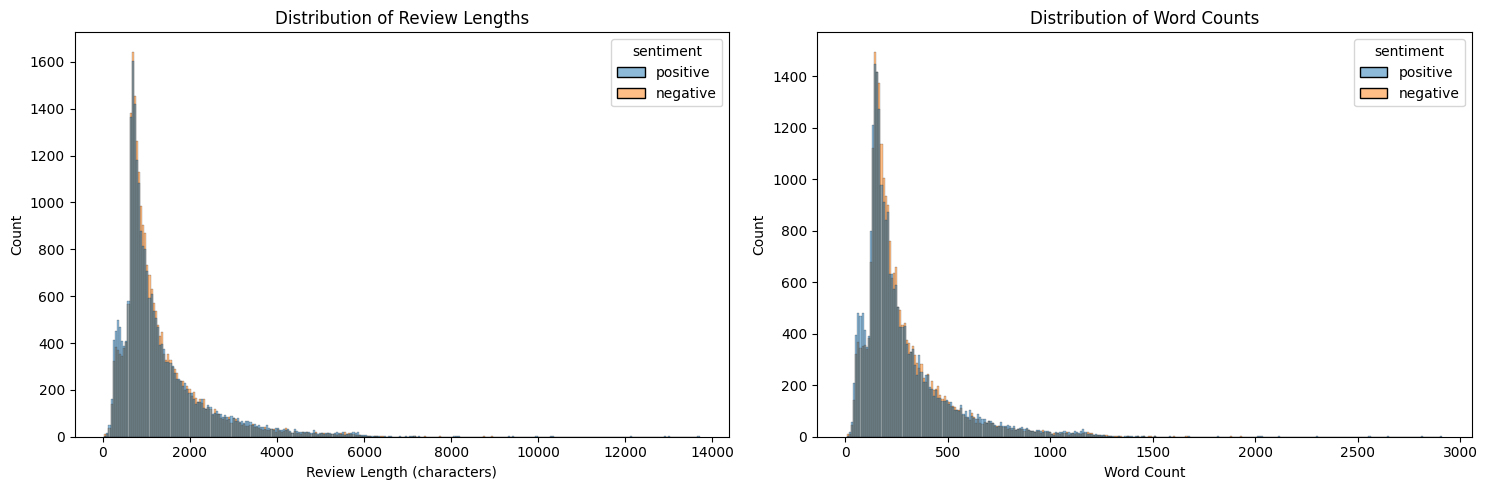

In [32]:
# Plot sentiment distribution
print("\nPlotting sentiment distribution...")
plot_sentiment_distribution(df)

# Plot length distributions
print("\nPlotting length distributions...")
plot_length_distributions(df)


In [14]:
def load_and_preprocess_data(max_words=10000, max_len=200):

    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nndl/cia1_labtest/IMDB Dataset.csv')

    # Convert sentiments to binary values
    le = LabelEncoder()
    df['sentiment'] = le.fit_transform(df['sentiment'])

    # Tokenize the text
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(df['review'])
    sequences = tokenizer.texts_to_sequences(df['review'])

    # Pad sequences to ensure uniform length
    X = pad_sequences(sequences, maxlen=max_len)
    y = df['sentiment'].values

    return X, y, tokenizer

# Build the model
def create_model(max_words=10000, max_len=200, embedding_dim=100):
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_len),
        Flatten(),  # Add this layer to flatten the 3D tensor to 2D
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Main execution
def main():
    # Load and preprocess data
    X, y, tokenizer = load_and_preprocess_data()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = create_model()

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {accuracy:.4f}")

    return model, tokenizer, history


model, tokenizer, history = main()



Epoch 1/10
1000/1000 [==============================] - 12s 11ms/step - loss: 0.3814 - accuracy: 0.8192 - val_loss: 0.2888 - val_accuracy: 0.8785
Epoch 2/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.1049 - accuracy: 0.9631 - val_loss: 0.4049 - val_accuracy: 0.8626
Epoch 3/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0252 - accuracy: 0.9912 - val_loss: 0.6051 - val_accuracy: 0.8604
Epoch 4/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0179 - accuracy: 0.9937 - val_loss: 0.6661 - val_accuracy: 0.8599
Epoch 5/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.7816 - val_accuracy: 0.8491
Epoch 6/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.8871 - val_accuracy: 0.8547
Epoch 7/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.8342 -

In [15]:
def predict_sentiment(model, tokenizer, text, max_len=200):
    # Preprocess the new text
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_len)

    # Predict
    prediction = model.predict(padded)[0]
    return "Positive" if prediction > 0.5 else "Negative", prediction[0]

In [16]:
new_review = "This movie was absolutely fantastic! I loved every minute of it."
sentiment, confidence = predict_sentiment(model, tokenizer, new_review)
print(f"Sentiment: {sentiment} (confidence: {confidence:.4f})")

1/1 [==============================] - 0s 96ms/step
Sentiment: Positive (confidence: 0.9983)
